# Classification Dataset

In [1]:
#Downloading Libraries
import pandas as pd 
import numpy as np
import random

Defining Absolutes and Normal Ranges for Males, Females and Children

In [2]:
ranges = {
    "Hemoglobin (g/dL)": {"min": [13, 12, 10.5], "normal": [15.5, 15, 14], "max": [17, 16, 15]},
    "RBC (million/µL)": {"min": [4.7, 4.2, 4.1], "normal": [5.5, 5, 5.5], "max": [6, 5.5, 6]},
    "Platelet Count (platelets/µL)": {"min": [150000, 150000, 200000], "normal": [450000, 450000, 500000], "max": [500000, 500000, 550000]},
    "Fasting Blood Sugar (mg/dL)": {"min": [70, 70, 70], "normal": [99, 99, 100], "max": [110, 110, 110]},
    "Hemoglobin A1C (%)": {"min": [4, 4, 4], "normal": [5.6, 5.6, 5.5], "max": [6, 6, 6]},
    "Serum Creatinine (mg/dL)": {"min": [0.7, 0.6, 0.2], "normal": [1.3, 1.1, 0.7], "max": [1.5, 1.3, 0.9]},
    "Blood Urea Nitrogen (BUN) (mg/dL)": {"min": [7, 7, 5], "normal": [20, 20, 18], "max": [25, 25, 22]},
    "Glomerular Filtration Rate (GFR) (mL/min/1.73m²)": {"min": [60, 60, 70], "normal": [90, 90, 100], "max": [120, 120, 130]},
    "Alanine Aminotransferase (ALT) (U/L)": {"min": [7, 7, 10], "normal": [35, 35, 25], "max": [50, 50, 40]},
    "Aspartate Aminotransferase (AST) (U/L)": {"min": [10, 10, 15], "normal": [35, 35, 30], "max": [40, 40, 35]},
    "Alkaline Phosphatase (ALP) (U/L)": {"min": [30, 30, 100], "normal": [100, 100, 350], "max": [120, 120, 400]},
    "Total Bilirubin (mg/dL)": {"min": [0.1, 0.1, 0.2], "normal": [0.3, 0.3, 0.5], "max": [1.2, 1.2, 1.5]},
    "Total Cholesterol (mg/dL)": {"min": [120, 120, 100], "normal": [200, 200, 170], "max": [220, 220, 190]},
    "LDL (mg/dL)": {"min": [50, 50, 50], "normal": [100, 100, 100], "max": [120, 120, 120]},
    "HDL (mg/dL)": {"min": [40, 50, 40], "normal": [60, 60, 70], "max": [70, 70, 80]},
    "Triglycerides (mg/dL)": {"min": [50, 50, 50], "normal": [150, 150, 130], "max": [170, 170, 150]},
    "Sodium (mEq/L)": {"min": [135, 135, 135], "normal": [145, 145, 145], "max": [150, 150, 150]},
    "Potassium (mEq/L)": {"min": [3.5, 3.5, 3.5], "normal": [5.1, 5.1, 5.5], "max": [5.5, 5.5, 6]},
    "Calcium (mg/dL)": {"min": [8.5, 8.5, 9], "normal": [10.5, 10.5, 11], "max": [11, 11, 12]},
    "Iron (µg/dL)": {"min": [50, 40, 30], "normal": [176, 170, 120], "max": [200, 190, 150]},
    "Ferritin (ng/mL)": {"min": [30, 20, 10], "normal": [336, 200, 100], "max": [400, 250, 150]},
    "Urine Protein": {"min": ["Absent", "Absent", "Absent"], "normal": ["Absent", "Absent", "Absent"], "max": ["Trace", "Trace", "Trace"]},
    "Urine Glucose": {"min": ["Absent", "Absent", "Absent"], "normal": ["Absent", "Absent", "Absent"], "max": ["Trace", "Trace", "Trace"]},
    "MCV (fL)": {"min": [80, 80, 70], "normal": [100, 100, 90], "max": [110, 110, 100]},
    "Troponin I (ng/mL)": {"min": [0, 0, 0], "normal": [0.03, 0.03, 0.03], "max": [0.04, 0.04, 0.04]},
    "Albumin (g/dL)": {"min": [3, 3, 3], "normal": [4.5, 4.5, 4.5], "max": [5.5, 5.5, 5.5]},
    "Globulin (g/dL)": {"min": [1.5, 1.5, 1.5], "normal": [2.5, 2.5, 2.5], "max": [3.5, 3.5, 3.5]}
}

absolute_ranges = {
    "Hemoglobin (g/dL)": {"abs_min": 5, "abs_max": 30},
    "RBC (million/µL)": {"abs_min": 2, "abs_max": 10},
    "Platelet Count (platelets/µL)": {"abs_min": 50000, "abs_max": 1000000},
    "Fasting Blood Sugar (mg/dL)": {"abs_min": 50, "abs_max": 600},
    "Hemoglobin A1C (%)": {"abs_min": 3, "abs_max": 20},
    "Serum Creatinine (mg/dL)": {"abs_min": 0.1, "abs_max": 15},
    "Blood Urea Nitrogen (BUN) (mg/dL)": {"abs_min": 5, "abs_max": 100},
    "Glomerular Filtration Rate (GFR) (mL/min/1.73m²)": {"abs_min": 5, "abs_max": 120},
    "Alanine Aminotransferase (ALT) (U/L)": {"abs_min": 5, "abs_max": 1000},
    "Aspartate Aminotransferase (AST) (U/L)": {"abs_min": 5, "abs_max": 1000},
    "Alkaline Phosphatase (ALP) (U/L)": {"abs_min": 20, "abs_max": 1500},
    "Total Bilirubin (mg/dL)": {"abs_min": 0.1, "abs_max": 30},
    "Total Cholesterol (mg/dL)": {"abs_min": 100, "abs_max": 700},
    "LDL (mg/dL)": {"abs_min": 30, "abs_max": 400},
    "HDL (mg/dL)": {"abs_min": 20, "abs_max": 150},
    "Triglycerides (mg/dL)": {"abs_min": 30, "abs_max": 5000},
    "Sodium (mEq/L)": {"abs_min": 120, "abs_max": 190},
    "Potassium (mEq/L)": {"abs_min": 2.5, "abs_max": 8},
    "Calcium (mg/dL)": {"abs_min": 7, "abs_max": 20},
    "Iron (µg/dL)": {"abs_min": 10, "abs_max": 1000},
    "Ferritin (ng/mL)": {"abs_min": 5, "abs_max": 10000},
    "Urine Protein": {"abs_min": "Absent", "abs_max": "Severe"},
    "Urine Glucose": {"abs_min": "Absent", "abs_max": "Extreme"},
    "MCV (fL)": {"abs_min": 60, "abs_max": 120},
    "Troponin I (ng/mL)": {"abs_min": 0, "abs_max": 50},
    "Albumin (g/dL)": {"abs_min": 2, "abs_max": 6},
    "Globulin (g/dL)": {"abs_min": 1, "abs_max": 5}
}


Generating Random Values

In [3]:
num_rows = 30000 #Number of rows to generate
genders = [] #Gender list
ages = [] #Age list

for i in range(num_rows): #for loop loops through the range of num_rows
    gender_choice = np.random.choice(["Men", "Women", "Children"], p=[0.4, 0.4, 0.2])  #probabilities of the gender distribution
    if gender_choice == "Children":
        age = np.random.randint(1, 18) #Children's age range from 1 to 18
    else:
        age = np.random.randint(18, 91) #Adults' age range from 18 to 90 [Male , Women] 
    genders.append(gender_choice)
    ages.append(age)

data = {
    "Gender": genders,
    "Age": ages
}

# Generate test results based on constrained data
for test, values in ranges.items(): #Iterate through the test {ranges} defined and their corresponding test
    min_vals = values["min"]
    normal_vals = values["normal"]
    max_vals = values["max"]
    abs_min = absolute_ranges[test]["abs_min"]
    abs_max = absolute_ranges[test]["abs_max"]

    test_data = []
    # Generate test results based on
    for i in range(num_rows):
        gender_index = ["Men", "Women", "Children"].index(data["Gender"][i])
        if isinstance(min_vals[gender_index], str):
            test_data.append(np.random.choice([
                min_vals[gender_index], normal_vals[gender_index], max_vals[gender_index]
            ]))
        else:
            rand = np.random.rand()
            if rand < 0.3:
                value = np.random.uniform(abs_min, min_vals[gender_index])
            elif rand < 0.8:
                value = np.random.uniform(min_vals[gender_index], max_vals[gender_index])
            else:
                value = np.random.uniform(max_vals[gender_index], abs_max)
            test_data.append(value)
    data[test] = test_data

df = pd.DataFrame(data)


In [4]:
df.sample(5)

,Gender,Age,Hemoglobin (g/dL),RBC (million/µL),Platelet Count (platelets/µL),Fasting Blood Sugar (mg/dL),Hemoglobin A1C (%),Serum Creatinine (mg/dL),Blood Urea Nitrogen (BUN) (mg/dL),Glomerular Filtration Rate (GFR) (mL/min/1.73m²),...,Potassium (mEq/L),Calcium (mg/dL),Iron (µg/dL),Ferritin (ng/mL),Urine Protein,Urine Glucose,MCV (fL),Troponin I (ng/mL),Albumin (g/dL),Globulin (g/dL)
26866,Children,1,8.317457,5.061697,258271.525008,64.978467,5.556037,0.129749,44.590112,103.948250,...,2.681671,10.436853,125.127416,75.068448,Trace,Trace,93.224249,9.499478,2.430054,4.970117
5373,Women,47,12.081031,4.777221,524878.249991,445.894285,4.015618,0.795241,14.438180,113.039423,...,6.386712,10.315445,107.961500,82.977932,Absent,Absent,101.388850,0.000000,2.118240,4.842510
28064,Men,41,10.751832,9.160242,267335.945694,60.144659,5.460078,1.021920,22.404115,120.000000,...,2.541490,18.985822,463.016629,324.113744,Absent,Trace,101.407712,0.000000,5.008166,1.785012
20852,Children,12,11.556420,5.256625,181588.224865,85.250611,5.801871,0.116740,5.000000,16.855247,...,5.323085,10.881963,659.196064,50.214202,Trace,Absent,81.655446,0.010299,4.361974,3.166171
16127,Men,39,15.135923,5.971425,154969.302051,78.444284,3.506806,12.445093,6.882089,14.941638,...,3.472116,9.864322,36.847735,5165.406875,Absent,Absent,113.592786,0.000000,2.727034,4.695371


Correlated Values

In [5]:
# 1. Inverse relationship between GFR and Creatinine
# Using CKD-EPI equation to model the inverse relationship
''' 
GFR => Glomerular Filtration Rate
≥ 90 → Healthy kidney function.

60-89 → Mildly reduced (early kidney disease).

< 60 (for 3+ months) → Chronic Kidney Disease (CKD).

< 15 → Kidney failure (dialysis or transplant needed).

Knowing that the CKD-EPI Equation is the same for men and female
'''
def calculate_gfr(creat, age, gender_series):
    """
    Vectorized CKD-EPI GFR calculation
    Args:
        creat: Series of creatinine values
        age: Series of ages
        gender_series: Series of gender strings ("Men", "Women", "Children")
    Returns:
        Series of GFR values
    """
    # Create masks for different genders
    is_women = (gender_series == "Women")
    is_children = (gender_series == "Children")
    
    # Calculate k and a based on gender
    k = np.where(is_women, 0.7, 0.9)
    a = np.where(is_women, -0.329, -0.411)
    
    # Special handling for children 
    k = np.where(is_children, 0.55, k)  
    a = np.where(is_children, -0.329, a)  # Using same as women for children
    
    # Gender factor
    gender_factor = np.where(is_women, 1.018, 1.0)
    
    # Calculate GFR
    gfr = 141 * np.minimum(creat/k, 1)**a * np.maximum(creat/k, 1)**-1.209 * 0.993**age * gender_factor
    
    return gfr

# Update GFR based on creatinine (keeping some randomness)
df["Glomerular Filtration Rate (GFR) (mL/min/1.73m²)"] = calculate_gfr(
    df["Serum Creatinine (mg/dL)"], 
    df["Age"], 
    df["Gender"]
) * np.random.uniform(0.95, 1.05, num_rows)  # Small random variation

# 2. Albumin/Globulin ratio in liver disease
# Calculate A/G ratio
df["Albumin/Globulin Ratio"] = df["Albumin (g/dL)"] / df["Globulin (g/dL)"]


In [6]:
df.sample(3)

,Gender,Age,Hemoglobin (g/dL),RBC (million/µL),Platelet Count (platelets/µL),Fasting Blood Sugar (mg/dL),Hemoglobin A1C (%),Serum Creatinine (mg/dL),Blood Urea Nitrogen (BUN) (mg/dL),Glomerular Filtration Rate (GFR) (mL/min/1.73m²),...,Calcium (mg/dL),Iron (µg/dL),Ferritin (ng/mL),Urine Protein,Urine Glucose,MCV (fL),Troponin I (ng/mL),Albumin (g/dL),Globulin (g/dL),Albumin/Globulin Ratio
9127,Men,34,14.640594,9.697418,592665.368003,61.794784,4.283938,0.995678,12.972475,101.146263,...,8.595115,35.461153,157.388535,Absent,Absent,106.264100,23.516851,5.610550,1.069243,5.247215
14967,Men,43,13.874554,4.771825,427233.593200,105.337492,3.281741,4.916601,7.056684,13.283651,...,10.260955,131.390782,5638.060072,Absent,Absent,91.872392,0.004906,2.179919,1.993779,1.093360
18835,Men,69,9.883932,2.128125,711657.971118,93.276808,4.790176,1.410292,7.076254,50.969328,...,10.782083,856.761012,386.259353,Absent,Absent,118.594536,0.000000,5.971214,3.819133,1.563500


Diseases Definition and Classification of data

In [7]:
# Initialize all disease columns
df["Diabetes"] = 0
df["Anemia"] = 0
df["Kidney Failure"] = 0
df["Liver Failure"] = 0
df["Ischimic Heart Disease"] = 0

# ___________________________________________________________________________________________________________

# Diabetes `Criteria`
''' 
    Based on Doctors and Professionals guidance Diabetes Mainly depends on:
-- Fasting Blood Sugar (mg/dL) levels Increase
-- Hemoglobin A1C (%) levels Increase
-- Urine Glucose levels Increase
***The Children Criteria not included in the Diabetes Criteria as the first three conditions are universal for all ages.***
'''
diabetes_conditions = (
    (df["Fasting Blood Sugar (mg/dL)"] >= 126) | 
    (df["Hemoglobin A1C (%)"] >= 6.5) |
    (df["Urine Glucose"] == "Trace") |
    (df["Urine Glucose"] == "Extreme") |
    ((df["Gender"] == "Men") & (df["Fasting Blood Sugar (mg/dL)"] >= 110) & (df["Triglycerides (mg/dL)"] >= 150)) |
    ((df["Gender"] == "Women") & (df["Fasting Blood Sugar (mg/dL)"] >= 110) & (df["HDL (mg/dL)"] < 50))
)
df.loc[diabetes_conditions, "Diabetes"] = 1


# ___________________________________________________________________________________________________________

# Kidney Failure Criteria
''' 
    Based on Doctors and Professionals guidance Kidney failure Mainly depends on:
    - Serum Creatinine (mg/dL) levels Increase
    - Blood Urea Nitrogen (BUN) (mg/dL) levels Increase
    - Glomerular Filtration Rate (GFR) (mL/min/1.73m²) levels Decrease
    - Urine Protein levels Increase
    - Diabetes and Liver Failure conditions
'''
kidney_conditions = (
    ((df["Gender"] == "Men") & (df["Serum Creatinine (mg/dL)"] > 1.35)) | 
    ((df["Gender"] == "Women") & (df["Serum Creatinine (mg/dL)"] > 1.04)) |
    ((df["Gender"] == "Children") & (df["Serum Creatinine (mg/dL)"] > 0.7)) |
    (df["Blood Urea Nitrogen (BUN) (mg/dL)"] > 20) | 
    (df["Glomerular Filtration Rate (GFR) (mL/min/1.73m²)"] < 60) |
    ((df["Urine Protein"] == "Trace") | (df["Urine Protein"] == "Severe")) |
    ((df["Diabetes"] == 1) & (df["Serum Creatinine (mg/dL)"] > 1.2))
)

df.loc[kidney_conditions, "Kidney Failure"] = 1

# Kidney disease with non-matching GFR-creatinine relationship
df.loc[(df["Kidney Failure"] == 1) & 
       df["Glomerular Filtration Rate (GFR) (mL/min/1.73m²)"] > 15, 
       "Kidney Failure"] = 0

# ___________________________________________________________________________________________________________

# Liver Failure Criteria
''' 
    Based on Doctors and Professionals guidance Liver failure Mainly depends on:
    - Alanine Aminotransferase (ALT) (U/L) levels Increase
    - Aspartate Aminotransferase (AST) (U/L) levels Increase
    - Alkaline Phosphatase (ALP) (U/L) levels Increase
    - Total Bilirubin (mg/dL) levels Increase
'''

liver_conditions = (
    ((df["Gender"] == "Men") & (df["Alanine Aminotransferase (ALT) (U/L)"] > 55)) |
    ((df["Gender"] == "Women") & (df["Alanine Aminotransferase (ALT) (U/L)"] > 45)) |
    ((df["Gender"] == "Children") & (df["Alanine Aminotransferase (ALT) (U/L)"] > 35)) |
    ((df["Aspartate Aminotransferase (AST) (U/L)"] / df["Alanine Aminotransferase (ALT) (U/L)"] > 2) & #AST/ALT Ratio > 2 + High Bilirubin
     (df["Total Bilirubin (mg/dL)"] > 1.2)) |
    ((df["Gender"] == "Men") & (df["Alkaline Phosphatase (ALP) (U/L)"] > 130)) | #High ALP (Alkaline Phosphatase)
    ((df["Gender"] == "Women") & (df["Alkaline Phosphatase (ALP) (U/L)"] > 120)) | #High ALP (Alkaline Phosphatase)
    ((df["Gender"] == "Children") & (df["Alkaline Phosphatase (ALP) (U/L)"] > 400)) | #High in children due to bone growth
    ((df["Total Bilirubin (mg/dL)"] > 2.5) & (df["Albumin (g/dL)"] < 3.0)) | #High Bilirubin + Low Albumin
    ((df["Diabetes"] == 1) & (df["Alanine Aminotransferase (ALT) (U/L)"] > 50) & #Diabetes + ALT + High Triglycerides
     (df["Triglycerides (mg/dL)"] > 200)) |
    (df["Platelet Count (platelets/µL)"] < 150000) #Low Platelet Count
)
df.loc[liver_conditions, "Liver Failure"] = 1

# Random multipliers
'''
After diagnosing the patient with liver failure, the following adjustments are made:
- Globulin levels are increased by a random multiplier between 1.2 and 2.0.
- Platelet counts are decreased by a random multiplier between 0.3 and 0.8.
These adjustments simulate typical liver failure lab patterns.
'''

globulin_multiplier = pd.Series(np.random.uniform(1.2, 2.0, size=len(df)), index=df.index)
platelet_multiplier = pd.Series(np.random.uniform(0.3, 0.8, size=len(df)), index=df.index)

# Apply modifications safely || Recalculating the values based on the liver failure condition
new_globulin = df.loc[liver_conditions, "Globulin (g/dL)"] * globulin_multiplier.loc[liver_conditions]
df.loc[liver_conditions, "Globulin (g/dL)"] = np.minimum(
    new_globulin,
    absolute_ranges["Globulin (g/dL)"]["abs_max"] #abs_max make sure that the values stays within the range
)

# Decrease platelets to simulate liver failure, but prevent dropping below critical biological minimum
new_platelets = df.loc[liver_conditions, "Platelet Count (platelets/µL)"] * platelet_multiplier.loc[liver_conditions]
df.loc[liver_conditions, "Platelet Count (platelets/µL)"] = np.maximum(
    new_platelets,
    absolute_ranges["Platelet Count (platelets/µL)"]["abs_min"]
)

df.loc[liver_conditions, "Liver Failure"] = 1


# ___________________________________________________________________________________________________________

# Anemia Criteria 
''' 
    Based on Doctors and Professionals guidance Anemia Mainly depends on:
    - Hemoglobin (g/dL) Decrease
    - RBC (million/µL) levels Decrease
    - MCV (fL) levels [Anemia Reasons]
'''
microcytic_anemia = (
    (df["MCV (fL)"] < 80) & 
    ((df["Iron (µg/dL)"] < 60) | (df["Ferritin (ng/mL)"] < 15))
)

normocytic_anemia = (
    (df["MCV (fL)"] >= 80) & (df["MCV (fL)"] <= 100) &
    ((df["Hemoglobin (g/dL)"] < 12) | (df["Kidney Failure"] == 1) | (df["Liver Failure"] == 1))
)

anemia_conditions = (
    ((df["Gender"] == "Men") & (df["Hemoglobin (g/dL)"] < 13.8)) | 
    ((df["Gender"] == "Women") & (df["Hemoglobin (g/dL)"] < 12.1)) |
    ((df["Gender"] == "Children") & (df["Hemoglobin (g/dL)"] < 10.5)) |
    ((df["Gender"] == "Men") & (df["RBC (million/µL)"] < 4.7)) | 
    ((df["Gender"] == "Women") & (df["RBC (million/µL)"] < 4.2)) |
    ((df["Gender"] == "Children") & (df["RBC (million/µL)"] < 4.1)) |
    microcytic_anemia | normocytic_anemia
)

''' SPECIAL CASE '''
# For iron deficiency cases
iron_deficiency_mask = anemia_conditions & (
    (df["Iron (µg/dL)"] < 60) | (df["Ferritin (ng/mL)"] < 15)
)

df.loc[anemia_conditions, "Anemia"] = 1
df.loc[iron_deficiency_mask, "Anemia"] = 1  # Mark as iron deficiency anemia

# ___________________________________________________________________________________________________________

#Ischmic Heart Disease Criteria
''' 
Based on Doctors and Professionals guidance Ischimic Heart Disease Mainly depends on:
    - Total Cholesterol (mg/dL) levels Increase
    - LDL (mg/dL) levels Increase
    - HDL (mg/dL) levels Decrease
    - Triglycerides (mg/dL) levels Increase
    - Troponin I (ng/mL) levels Increase
    - Diabetes and Kidney Failure conditions
'''

heart_conditions = (
    (df["Total Cholesterol (mg/dL)"] >= 240) |
    (df["LDL (mg/dL)"] >= 160) |
    ((df["Gender"] == "Men") & (df["HDL (mg/dL)"] < 40)) | 
    ((df["Gender"] == "Women") & (df["HDL (mg/dL)"] < 50)) |
    ((df["Gender"] == "Children") & (df["HDL (mg/dL)"] < 40)) |
    (df["Triglycerides (mg/dL)"] >= 200) |
    (df["Troponin I (ng/mL)"] > 0.04) |
    ((df["Diabetes"] == 1) & (df["LDL (mg/dL)"] >= 100)) |
    ((df["Kidney Failure"] == 1) & (df["LDL (mg/dL)"] >= 130))
)
df.loc[heart_conditions, "Ischimic Heart Disease"] = 1

# ___________________________________________________________________________________________________________

# CLINICAL CONSISTENCY CHECKS || Checked and logic revised
df.loc[(df["Anemia"] == 1) & (df["Hemoglobin (g/dL)"] > 16), "Anemia"] = 0
df.loc[(df["Kidney Failure"] == 1) & (df["Glomerular Filtration Rate (GFR) (mL/min/1.73m²)"] > 90), "Kidney Failure"] = 0
df.loc[(df["Liver Failure"] == 1) & 
       (df["Alanine Aminotransferase (ALT) (U/L)"] < 40) & 
       (df["Aspartate Aminotransferase (AST) (U/L)"] < 40) &
       (df["Total Bilirubin (mg/dL)"] < 2), "Liver Failure"] = 0
df.loc[(df["Ischimic Heart Disease"] == 1) & 
       (df["Troponin I (ng/mL)"] < 0.01) & 
       (df["LDL (mg/dL)"] < 100), "Ischimic Heart Disease"] = 0
df.loc[(df["Liver Failure"] == 1) & 
       (df["Platelet Count (platelets/µL)"] > 200000) & 
       (df["Albumin/Globulin Ratio"] > 1.2), "Liver Failure"] = 0

# SAVE DATASET 
df.to_csv("clinically_validated_balanced_disease_data.csv", index=False)
print("Dataset successfully generated with balanced disease classes and clinical validation")


Dataset successfully generated with balanced disease classes and clinical validation


In [8]:
df.sample(3)

,Gender,Age,Hemoglobin (g/dL),RBC (million/µL),Platelet Count (platelets/µL),Fasting Blood Sugar (mg/dL),Hemoglobin A1C (%),Serum Creatinine (mg/dL),Blood Urea Nitrogen (BUN) (mg/dL),Glomerular Filtration Rate (GFR) (mL/min/1.73m²),...,MCV (fL),Troponin I (ng/mL),Albumin (g/dL),Globulin (g/dL),Albumin/Globulin Ratio,Diabetes,Anemia,Kidney Failure,Liver Failure,Ischimic Heart Disease
18584,Children,15,9.825544,9.996272,212806.714735,54.675609,4.812943,0.708389,20.209141,94.754262,...,61.586608,0.031019,3.296452,2.641199,1.602769,0,1,0,0,1
9378,Children,12,10.889839,7.759619,214845.106881,95.876626,4.276962,0.471952,20.795237,133.229508,...,95.330488,0.035251,2.852120,4.042911,0.705462,0,1,0,0,1
5680,Children,5,12.363201,3.372094,304627.726762,58.616791,17.826049,0.576810,5.000000,128.358037,...,60.601862,0.000000,4.513866,5.000000,1.443595,1,1,0,0,0


In [9]:
df.columns

Index(['Gender', 'Age', 'Hemoglobin (g/dL)', 'RBC (million/µL)',
       'Platelet Count (platelets/µL)', 'Fasting Blood Sugar (mg/dL)',
       'Hemoglobin A1C (%)', 'Serum Creatinine (mg/dL)',
       'Blood Urea Nitrogen (BUN) (mg/dL)',
       'Glomerular Filtration Rate (GFR) (mL/min/1.73m²)',
       'Alanine Aminotransferase (ALT) (U/L)',
       'Aspartate Aminotransferase (AST) (U/L)',
       'Alkaline Phosphatase (ALP) (U/L)', 'Total Bilirubin (mg/dL)',
       'Total Cholesterol (mg/dL)', 'LDL (mg/dL)', 'HDL (mg/dL)',
       'Triglycerides (mg/dL)', 'Sodium (mEq/L)', 'Potassium (mEq/L)',
       'Calcium (mg/dL)', 'Iron (µg/dL)', 'Ferritin (ng/mL)', 'Urine Protein',
       'Urine Glucose', 'MCV (fL)', 'Troponin I (ng/mL)', 'Albumin (g/dL)',
       'Globulin (g/dL)', 'Albumin/Globulin Ratio', 'Diabetes', 'Anemia',
       'Kidney Failure', 'Liver Failure', 'Ischimic Heart Disease'],
      dtype='object')

In [10]:
# Disable scientific notation for all columns
pd.set_option('display.float_format', '{:.2f}'.format)

In [11]:
# Display sample
df.sample(20)

,Gender,Age,Hemoglobin (g/dL),RBC (million/µL),Platelet Count (platelets/µL),Fasting Blood Sugar (mg/dL),Hemoglobin A1C (%),Serum Creatinine (mg/dL),Blood Urea Nitrogen (BUN) (mg/dL),Glomerular Filtration Rate (GFR) (mL/min/1.73m²),...,MCV (fL),Troponin I (ng/mL),Albumin (g/dL),Globulin (g/dL),Albumin/Globulin Ratio,Diabetes,Anemia,Kidney Failure,Liver Failure,Ischimic Heart Disease
28548,Men,55,14.81,4.85,50000.00,57.19,4.71,6.80,11.60,8.44,...,93.83,0.00,2.11,3.30,0.96,1,1,1,1,0
15682,Men,37,25.88,4.90,50000.00,460.67,3.46,0.45,17.50,148.57,...,73.67,0.00,2.43,2.62,1.74,1,0,0,0,0
20799,Women,46,6.72,6.33,200342.42,83.48,5.21,0.58,7.94,105.20,...,81.90,36.55,5.46,4.55,1.20,1,1,0,0,1
20710,Children,7,12.70,5.73,158533.59,57.80,8.58,0.19,21.82,181.40,...,66.13,0.00,5.71,5.00,1.35,1,0,0,1,0
24275,Children,7,6.67,2.83,232619.69,98.46,3.57,0.45,5.00,142.81,...,62.70,0.01,3.71,4.03,1.40,0,1,0,0,0
21322,Women,22,15.68,5.00,50000.00,80.10,5.51,0.65,5.85,130.21,...,116.48,0.03,4.43,2.79,3.09,0,0,0,1,1
2276,Men,55,15.15,2.11,50000.00,50.31,16.31,0.77,87.24,100.44,...,95.64,0.03,4.54,3.97,1.50,1,1,0,1,1
9732,Men,86,14.91,6.65,299922.68,58.49,9.28,0.95,6.36,71.67,...,112.19,23.18,4.49,1.34,3.34,1,0,1,0,1
17097,Men,68,11.32,8.54,909734.62,52.55,5.23,1.05,17.80,71.28,...,111.48,0.01,5.05,1.60,3.16,0,1,0,0,0
13947,Women,30,24.35,2.84,91790.80,94.39,5.69,0.80,5.74,99.12,...,106.76,0.01,2.78,1.57,2.37,0,0,0,0,1


In [12]:
# Calculate the percentage of all unique values in the column
pD = df["Diabetes"].value_counts(normalize=True) * 100
pA = df["Anemia"].value_counts(normalize=True) * 100
pK = df["Kidney Failure"].value_counts(normalize=True) * 100
pL = df["Liver Failure"].value_counts(normalize=True) * 100
pH = df["Ischimic Heart Disease"].value_counts(normalize=True) * 100

# Print the result
print(pD,'\n',pA,'\n',pK,'\n',pL,'\n',pH)

Diabetes
1   56.58
0   43.42
Name: proportion, dtype: float64 
 Anemia
1   60.07
0   39.93
Name: proportion, dtype: float64 
 Kidney Failure
0   53.29
1   46.71
Name: proportion, dtype: float64 
 Liver Failure
0   67.76
1   32.24
Name: proportion, dtype: float64 
 Ischimic Heart Disease
1   58.53
0   41.47
Name: proportion, dtype: float64


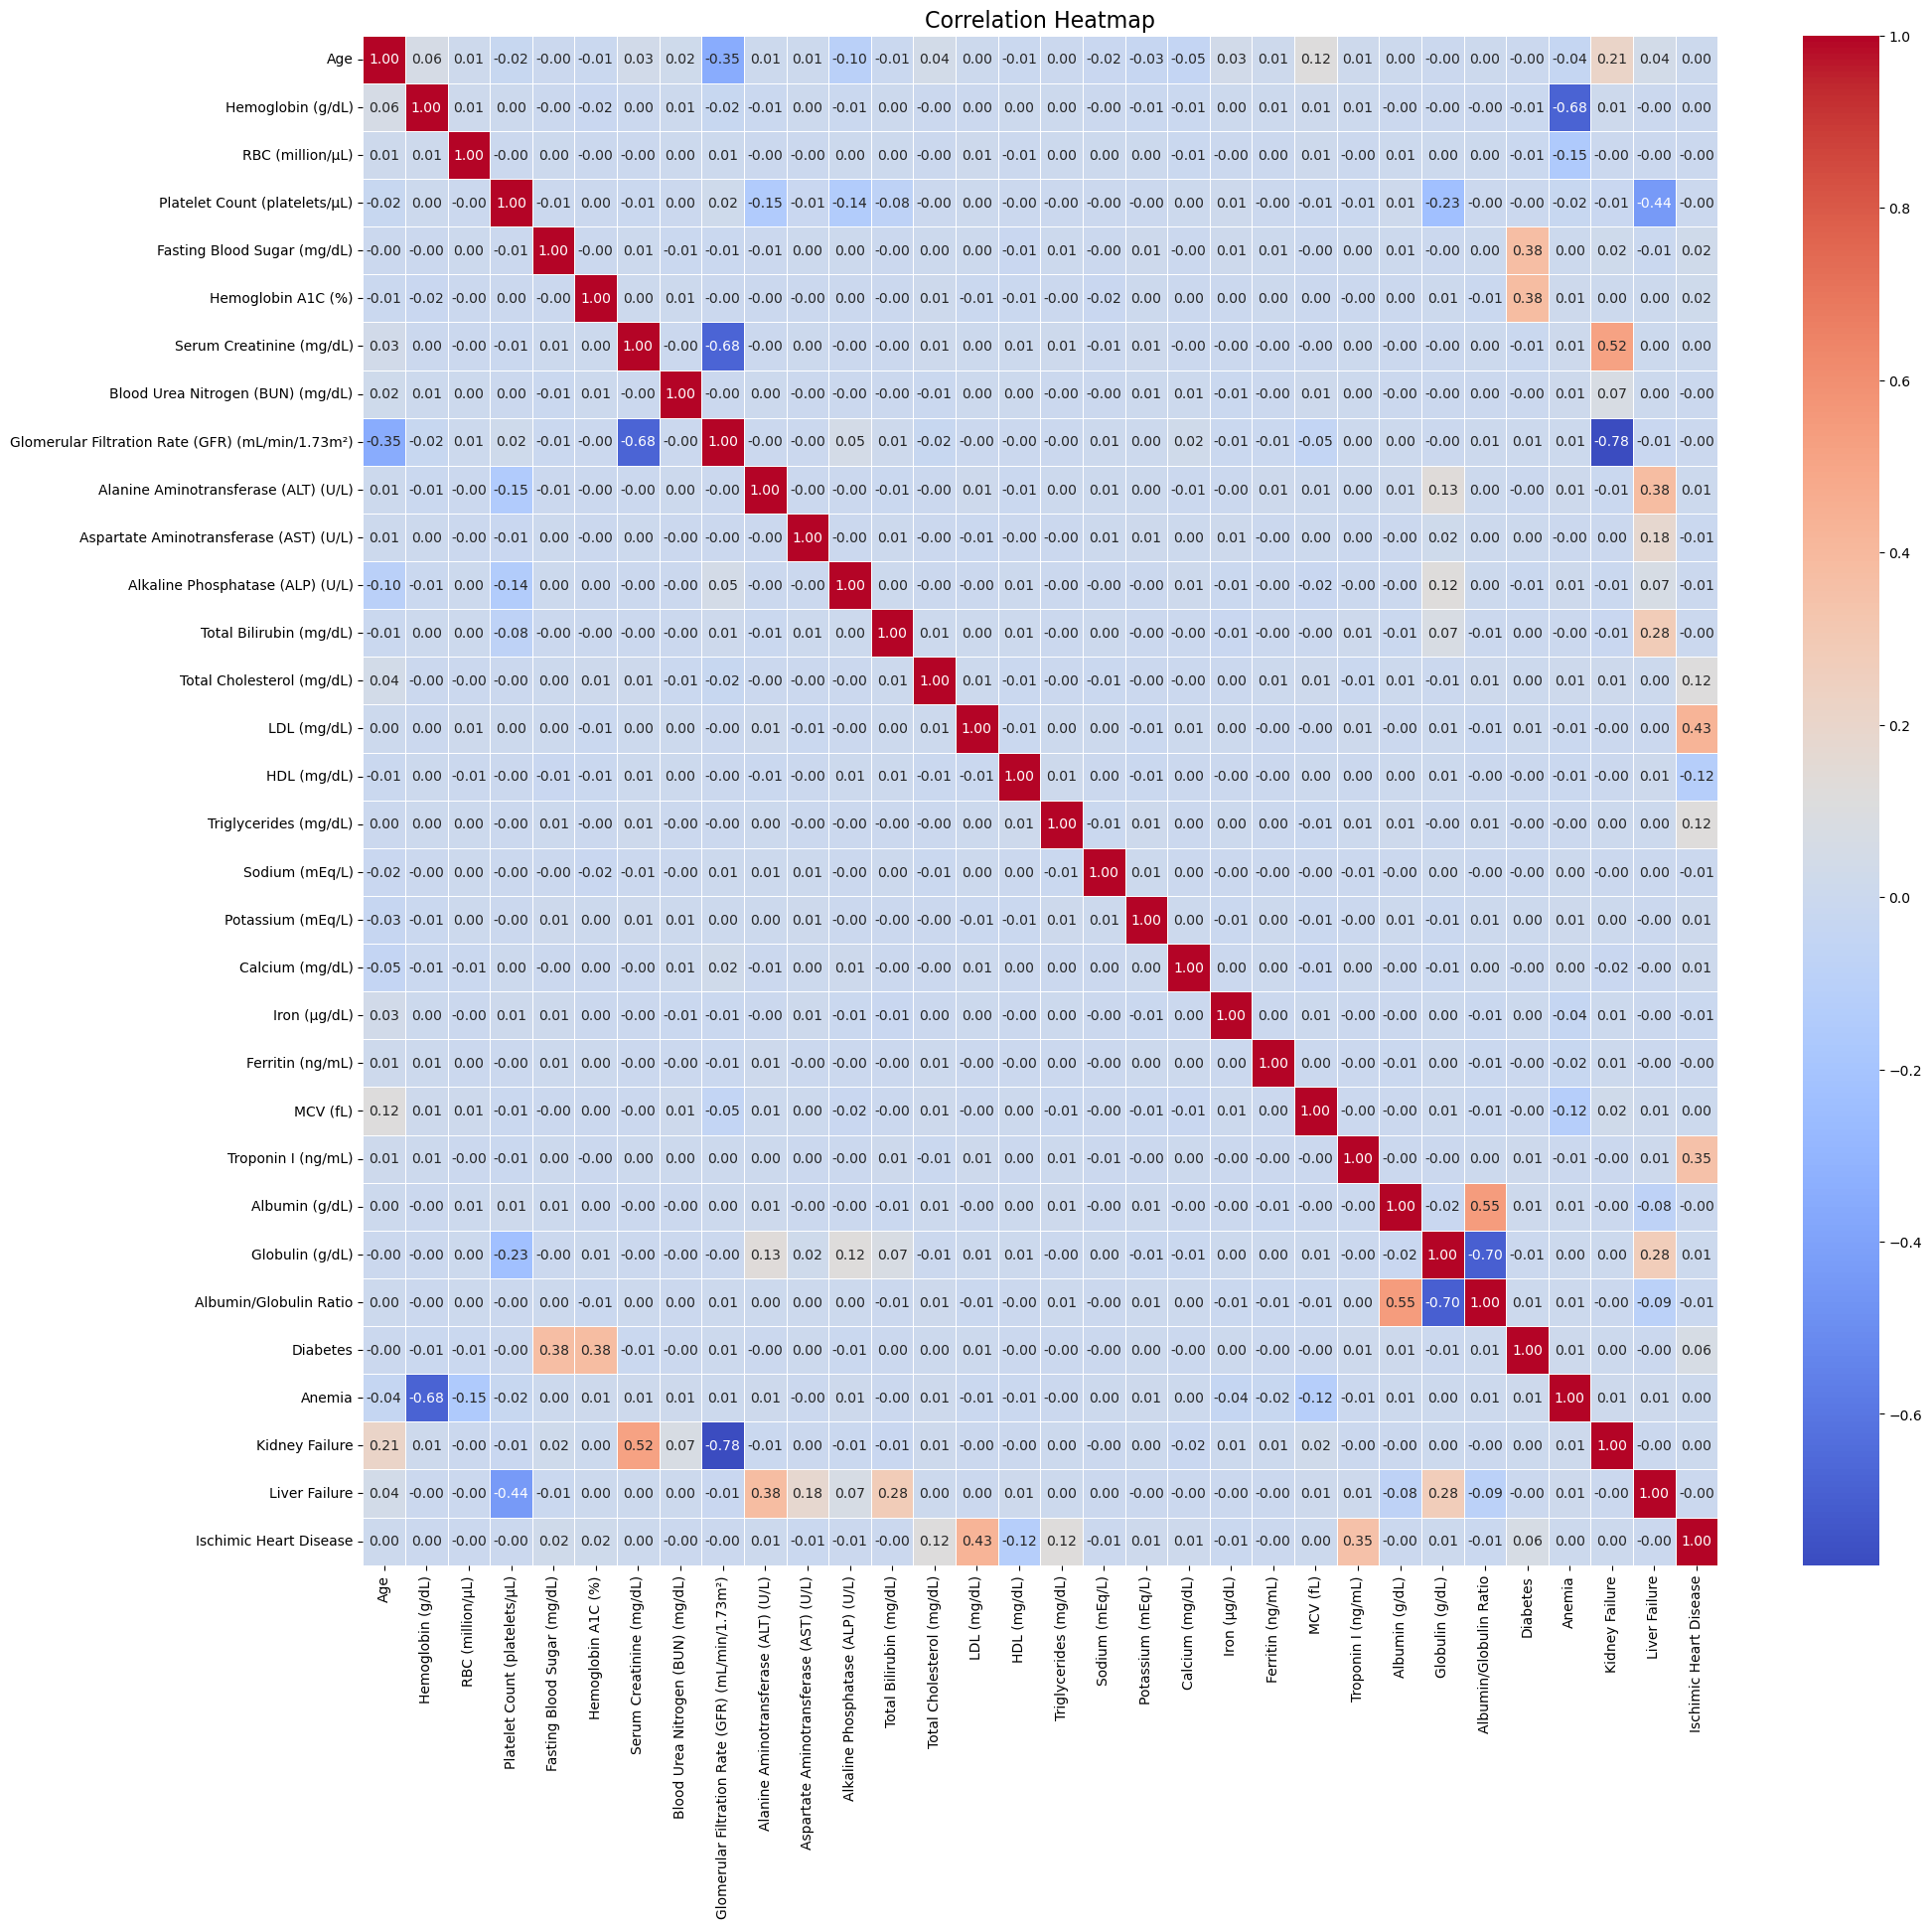

In [13]:
import seaborn as sns

import matplotlib.pyplot as plt

# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(22, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [14]:
from IPython.display import FileLink

# Create a download link
FileLink("27lab_tests_classificationM.csv")

c:\Users\marya\AppData\Local\Microsoft\Windows\INetCache\IE\3AY4PWET\27lab_tests_classificationM.csv

# Progression Datasets

### Enhanced Diabetes

In [15]:
# Define constants for the tests
'''
There are many several constrains
- Male
- Female
- Children
_______________
Male and Female old
 
'''

TEST_RANGES = {
    "Oral Glucose Tolerance Test (OGTT)": {
        "absolute_min": 0,
        "absolute_max": 300,
        "normal_ranges": {
            "Male": (70, 140),
            "Female": (70, 140),
            "Children": (70, 140),
            "Male_Old": (70, 160),
            "Female_Old": (70, 160)
        }
    },
    "C-Peptide": {
        "absolute_min": 0,
        "absolute_max": 10,
        "normal_ranges": {
            "Male": (0.9, 4.0),
            "Female": (0.9, 4.0),
            "Children": (0.9, 4.0),
            "Male_Old": (0.8, 3.5),
            "Female_Old": (0.8, 3.5)
        }
    },
    "Microalbuminuria (Urine Albumin)": {
        "absolute_min": 0,
        "absolute_max": 300,
        "normal_ranges": {
            "Male": (0, 30),
            "Female": (0, 30),
            "Children": (0, 30),
            "Male_Old": (0, 40),
            "Female_Old": (0, 40)
        }
    }
}

# Generate synthetic data
np.random.seed(42)
num_samples = 20000
healthy_samples = int(num_samples * 0.3)  # 30% healthy
diseased_samples = num_samples - healthy_samples  # 70% diseased (to be split later to 35% type1 and 35% type2)
type1_samples = diseased_samples // 2
type2_samples = diseased_samples - type1_samples



In [16]:
# Initialize lists to store data
ages = []
genders = []
ogtt_values = []
c_peptide_values = []
microalbuminuria_values = []
disease_progression = []
diabetes_types = []

# Generate healthy individuals (30%)

# the 'for _ ' is used to indicate that the loop variable is not used in the loop body. 
for _ in range(healthy_samples):
    gender = np.random.choice(["Male", "Female", "Children"]) #Choose a gender from 3 options
    if gender == "Children": #if it's a child, the age is between 1 and 18
        age = np.random.randint(1, 18)
    else:
        age = np.random.randint(18, 81) #if it's an adult, the age is between 18 and 80
        
        ''' Boolean value if age > 60 is_old = True else false'''
    is_old = age > 60 if gender in ["Male", "Female"] else False #Check if the age is older than 60 for adults only
    
    # Get the normal ranges for OGTT, C-Peptide, and Microalbuminuria based on 
    ''' 
    If an adult is old (is_old = True), get the "Male_Old" or "Female_Old" range.
    Otherwise, use the general "Male", "Female", or "Children" range.
    '''
    ogtt_range = TEST_RANGES["Oral Glucose Tolerance Test (OGTT)"]["normal_ranges"][f"{gender}_Old"] if is_old and gender != "Children" else TEST_RANGES["Oral Glucose Tolerance Test (OGTT)"]["normal_ranges"][gender]

    c_peptide_range = TEST_RANGES["C-Peptide"]["normal_ranges"][f"{gender}_Old"] if is_old and gender != "Children" else TEST_RANGES["C-Peptide"]["normal_ranges"][gender]
    
    microalbuminuria_range = TEST_RANGES["Microalbuminuria (Urine Albumin)"]["normal_ranges"][f"{gender}_Old"] if is_old and gender != "Children" else TEST_RANGES["Microalbuminuria (Urine Albumin)"]["normal_ranges"][gender]

    
    #_______________Generate Random Test Values in Normal Ranges__________________
    ogtt = np.random.uniform(*ogtt_range)
    c_peptide = np.random.uniform(*c_peptide_range)
    microalbuminuria = np.random.uniform(*microalbuminuria_range)

    ages.append(age)
    genders.append(gender)
    ogtt_values.append(ogtt)
    c_peptide_values.append(c_peptide)
    microalbuminuria_values.append(microalbuminuria)
    disease_progression.append(0)
    diabetes_types.append("No Diabetes")

# Generate individuals with Type 1 diabetes (more likely in youth)
for _ in range(type1_samples):
    gender = np.random.choice(["Male", "Female", "Children"])
    if gender == "Children":
        age = np.random.randint(1, 18)
    else:
        age = np.random.randint(18, 81)

    # Determine ranges for abnormalities: make OGTT high, C-peptide low, microalbuminuria variable
    is_old = age > 60 if gender in ["Male","Female"] else False
    ogtt_range = (141, 300)  # Elevated OGTT
    c_peptide_range = (0.1, 1.5)  # Low insulin production
    microalbuminuria_range = (100, 300) if is_old else (30, 300)  # Slightly worse for old adults

    ogtt = np.random.uniform(*ogtt_range)
    c_peptide = np.random.uniform(*c_peptide_range)
    microalbuminuria = np.random.uniform(*microalbuminuria_range)

    # Normalize and calculate progression severity
    ogtt_norm = (ogtt - 0) / 300
    c_peptide_norm = (c_peptide - 0) / 10
    microalbuminuria_norm = (microalbuminuria - 0) / 300

    progression = (ogtt_norm * 0.5 + c_peptide_norm * 0.3 + microalbuminuria_norm * 0.2) * 100

    ages.append(age)
    genders.append(gender)
    ogtt_values.append(ogtt)
    c_peptide_values.append(c_peptide)
    microalbuminuria_values.append(microalbuminuria)
    disease_progression.append(progression)
    diabetes_types.append("Type 1")

    # Generate individuals with Type 2 diabetes (typically older adults)
for _ in range(type2_samples):
    gender = np.random.choice(["Male", "Female"])
    age = np.random.randint(40, 81)

    is_old = age > 60

    ogtt_range = (140, 300)  # More realistic range for Type 2 (post-load glucose often elevated)
    c_peptide_range = (1.5, 10)  # Reflecting insulin resistance (not insulin deficiency)
    microalbuminuria_range = (100, 400) if is_old else (30, 300)  # Higher risk for older adults

    ogtt = np.random.uniform(*ogtt_range)
    c_peptide = np.random.uniform(*c_peptide_range)
    microalbuminuria = np.random.uniform(*microalbuminuria_range)

    ogtt_norm = (ogtt - 0) / 300
    c_peptide_norm = (c_peptide - 0) / 10
    microalbuminuria_norm = (microalbuminuria - 0) / 300

    progression = (ogtt_norm * 0.5 + c_peptide_norm * 0.3 + microalbuminuria_norm * 0.2) * 100

    ages.append(age)
    genders.append(gender)
    ogtt_values.append(ogtt)
    c_peptide_values.append(c_peptide)
    microalbuminuria_values.append(microalbuminuria)
    disease_progression.append(progression)
    diabetes_types.append("Type 2")

In [17]:
# Create DataFrame
df_D = pd.DataFrame({
    "Age": ages,
    "Gender": genders,
    "Oral Glucose Tolerance Test (OGTT)": ogtt_values,
    "C-Peptide": c_peptide_values,
    "Microalbuminuria (Urine Albumin)": microalbuminuria_values,
    "Disease Progression (%)": disease_progression,
    "Diabetes Type": diabetes_types
})

# Shuffle the dataset
df_D = df_D.sample(frac=1, random_state=42).reset_index(drop=True)

# Save dataset to CSV
df_D.to_csv("diabetes_progression_dataset_with_classification.csv", index=False)

In [18]:
# Display the first few rows of the dataset
df_D.sample(20)

,Age,Gender,Oral Glucose Tolerance Test (OGTT),C-Peptide,Microalbuminuria (Urine Albumin),Disease Progression (%),Diabetes Type
4978,4,Children,115.20,3.96,6.42,0.00,No Diabetes
14085,20,Male,283.63,1.34,68.26,55.85,Type 1
19635,42,Male,262.30,6.55,222.89,78.23,Type 2
11112,39,Female,298.25,0.81,293.16,71.67,Type 1
19581,60,Male,293.98,7.76,275.39,90.65,Type 2
7001,69,Female,170.19,7.29,150.19,60.24,Type 2
18469,54,Female,184.06,3.71,38.62,44.39,Type 2
17731,80,Male,131.34,2.85,23.83,0.00,No Diabetes
3643,16,Children,224.28,1.04,260.82,57.88,Type 1
2770,53,Male,191.59,0.45,114.90,40.94,Type 1


In [19]:
pD = df_D["Diabetes Type"].value_counts(normalize=True) * 100
pD

Diabetes Type
Type 1        35.00
Type 2        35.00
No Diabetes   30.00
Name: proportion, dtype: float64

## Anemia

In [20]:
TEST_RANGES = {
    "Total Iron Binding Capacity (TIBC)": {
        "absolute_min": 100,
        "absolute_max": 500,
        "normal_ranges": {
            "Children": (270, 450),
            "Male": (250, 450),
            "Female": (250, 450),
            "Male_Old": (250, 500),
            "Female_Old": (250, 500)
        }
    },
    "Vitamin B12": {
        "absolute_min": 100,
        "absolute_max": 2000,
        "normal_ranges": {
            "Children": (250, 900),
            "Male": (200, 900),
            "Female": (200, 900),
            "Male_Old": (150, 900),
            "Female_Old": (150, 900)
        }
    },
    "Folate": {
        "absolute_min": 2,
        "absolute_max": 20,
        "normal_ranges": {
            "Children": (4, 20),
            "Male": (4, 20),
            "Female": (4, 20),
            "Male_Old": (4, 20),
            "Female_Old": (4, 20)
        }
    },
    "Reticulocyte Count": {
        "absolute_min": 0.5,
        "absolute_max": 2.5,
        "normal_ranges": {
            "Children": (1.0, 2.0),
            "Male": (0.5, 1.5),
            "Female": (0.5, 1.5),
            "Male_Old": (0.5, 1.5),
            "Female_Old": (0.5, 1.5)
        }
    }
}

# Parameters
np.random.seed(42)
num_samples = 20000
healthy_samples = int(num_samples * 0.3) # 30% healthy
diseased_samples = num_samples - healthy_samples


In [21]:
# Initialize lists
ages, genders = [], []
tibc_values, vitamin_b12_values = [], []
folate_values, reticulocyte_values = [], []
disease_progression = []

# Generate healthy individuals
for _ in range(healthy_samples):
    gender = np.random.choice(["Male", "Female","Children"])
    if gender == "Children":
        age = np.random.randint(1, 18)
    else:
        age = np.random.randint(18, 81)
    
    is_old = age > 60 if gender in ["Male","Female"] else False
    # Sample values from correct medical ranges
    tibc = np.random.uniform(*TEST_RANGES["Total Iron Binding Capacity (TIBC)"]["normal_ranges"][f"{gender}_Old"] if is_old and gender != "Children" else TEST_RANGES["Total Iron Binding Capacity (TIBC)"]["normal_ranges"][gender])
    b12 = np.random.uniform(*TEST_RANGES["Vitamin B12"]["normal_ranges"][f"{gender}_Old"] if is_old and gender != "Children" else TEST_RANGES["Vitamin B12"]["normal_ranges"][gender])
    folate = np.random.uniform(*TEST_RANGES["Folate"]["normal_ranges"][f"{gender}_Old"] if is_old and gender != "Children" else TEST_RANGES["Folate"]["normal_ranges"][gender])
    retic = np.random.uniform(*TEST_RANGES["Reticulocyte Count"]["normal_ranges"][f"{gender}_Old"] if is_old and gender != "Children" else TEST_RANGES["Reticulocyte Count"]["normal_ranges"][gender])

    # Append to lists
    ages.append(age)
    genders.append(gender)
    tibc_values.append(tibc)
    vitamin_b12_values.append(b12)
    folate_values.append(folate)
    reticulocyte_values.append(retic)
    disease_progression.append(0)

# Generate diseased individuals
for _ in range(diseased_samples):
    gender = np.random.choice(["Male", "Female", "Children"])
    
    if gender == "Children":
        age = np.random.randint(1, 18)
    else:
        age = np.random.randint(18, 81)

    is_old = age > 60 if gender in ["Male", "Female"] else False

    # Sample abnormal values across full medical range
    tibc = np.random.uniform(TEST_RANGES["Total Iron Binding Capacity (TIBC)"]["absolute_min"],
                             TEST_RANGES["Total Iron Binding Capacity (TIBC)"]["absolute_max"])
    b12 = np.random.uniform(TEST_RANGES["Vitamin B12"]["absolute_min"],
                            TEST_RANGES["Vitamin B12"]["absolute_max"])
    folate = np.random.uniform(TEST_RANGES["Folate"]["absolute_min"],
                               TEST_RANGES["Folate"]["absolute_max"])
    retic = np.random.uniform(TEST_RANGES["Reticulocyte Count"]["absolute_min"],
                              TEST_RANGES["Reticulocyte Count"]["absolute_max"])

    # Normalize values
    tibc_norm = (tibc - 100) / (500 - 100)
    b12_norm = (b12 - 100) / (2000 - 100)
    folate_norm = (folate - 2) / (20 - 2)
    retic_norm = (retic - 0.5) / (2.5 - 0.5)

    # Base progression score
    progression = (tibc_norm * 0.4 + b12_norm * 0.3 + folate_norm * 0.2 + retic_norm * 0.1) * 100

    # Adjust progression based on age and gender
    if is_old:
        progression *= 1.2
    if gender == "Female":
        progression *= 1.1
    if gender == "Children":
        progression *= 0.8

    # Append to lists
    ages.append(age)
    genders.append(gender)
    tibc_values.append(tibc)
    vitamin_b12_values.append(b12)
    folate_values.append(folate)
    reticulocyte_values.append(retic)
    disease_progression.append(progression)

In [22]:
# Create DataFrame
df_A = pd.DataFrame({
    "Age": ages,
    "Gender": genders,
    "Total Iron Binding Capacity (TIBC)": tibc_values,
    "Vitamin B12": vitamin_b12_values,
    "Folate": folate_values,
    "Reticulocyte Count": reticulocyte_values,
    "Disease Progression (%)": disease_progression
})

# Shuffle and save
df_A = df_A.sample(frac=1, random_state=42).reset_index(drop=True)
df_A.to_csv("anemia_progression_dataset.csv", index=False)


In [23]:
df_A.sample(20)

,Age,Gender,Total Iron Binding Capacity (TIBC),Vitamin B12,Folate,Reticulocyte Count,Disease Progression (%)
13016,13,Children,290.28,701.42,10.27,1.79,35.33
19611,11,Children,313.85,269.21,9.05,0.93,27.24
5395,2,Children,404.66,1422.57,13.83,1.93,57.32
4414,58,Female,218.00,1051.83,15.62,1.59,52.14
16450,78,Female,134.11,1037.92,17.50,0.60,47.47
8867,16,Children,448.05,1228.12,19.81,0.55,58.13
19457,61,Male,274.97,666.03,7.87,1.41,0.00
11345,36,Male,201.67,1707.46,19.64,0.89,57.08
5621,61,Female,147.38,944.72,14.63,2.33,54.49
9575,39,Male,186.67,491.09,5.72,0.51,19.03


## Kidney_Failure

In [24]:
# Define constants for the tests
TEST_RANGES = {
    "24-hour Urine Protein": {
        "absolute_min": 0,
        "absolute_max": 1000,
        "normal_ranges": {
            "Male": (0, 150),
            "Female": (0, 150),
            "Male_Old": (0, 200),
            "Female_Old": (0, 200),
            "Children": (0, 100)  
        }
    },
    "Serum Uric Acid": {
        "absolute_min": 1,
        "absolute_max": 12,
        "normal_ranges": {
            "Male": (3.5, 7.2),
            "Female": (2.5, 6.0),
            "Male_Old": (4.0, 8.0),
            "Female_Old": (3.0, 7.0),
            "Children": (2.0, 5.5)  
        }
    },
    "Serum Creatinine": {
        "absolute_min": 0.5,
        "absolute_max": 10,
        "normal_ranges": {
            "Male": (0.6, 1.2),
            "Female": (0.5, 1.1),
            "Male_Old": (0.7, 1.3),
            "Female_Old": (0.6, 1.2),
            "Children": (0.3, 0.7)  
        }
    },
    "Glomerular Filtration Rate (GFR)": {
        "absolute_min": 15,
        "absolute_max": 120,
        "normal_ranges": {
            "Male": (90, 120),
            "Female": (80, 110),
            "Male_Old": (60, 90),
            "Female_Old": (50, 80),
            "Children": (90, 120)  
        }
    },
    "Blood Urea Nitrogen (BUN)": {
        "absolute_min": 5,
        "absolute_max": 50,
        "normal_ranges": {
            "Male": (7, 20),
            "Female": (6, 18),
            "Male_Old": (8, 25),
            "Female_Old": (7, 22),
            "Children": (5, 18)  
        }
    }
}

# Children ranges included
# Generate synthetic data
np.random.seed(42)
num_samples = 20000
healthy_samples = int(num_samples * 0.3)
diseased_samples = num_samples - healthy_samples


In [25]:
# Initialize lists
ages, genders = [], []
urine_protein_values, uric_acid_values = [], []
creatinine_values, gfr_values, bun_values = [], [], []
disease_progression = []

# Healthy individuals
for _ in range(healthy_samples):
    gender = np.random.choice(["Male", "Female", "Children"])
    if gender == "Children":
        age = np.random.randint(1, 18)
    else:
        age = np.random.randint(18, 81)
    
    is_old = age > 60 if gender in ["Male", "Female"] else False
    key = f"{gender}_Old" if is_old and gender != "Children" else gender

    urine_protein = np.random.uniform(*TEST_RANGES["24-hour Urine Protein"]["normal_ranges"][key])
    uric_acid = np.random.uniform(*TEST_RANGES["Serum Uric Acid"]["normal_ranges"][key])
    creatinine = np.random.uniform(*TEST_RANGES["Serum Creatinine"]["normal_ranges"][key])
    gfr = np.random.uniform(*TEST_RANGES["Glomerular Filtration Rate (GFR)"]["normal_ranges"][key])
    bun = np.random.uniform(*TEST_RANGES["Blood Urea Nitrogen (BUN)"]["normal_ranges"][key])

    ages.append(age)
    genders.append(gender)
    urine_protein_values.append(urine_protein)
    uric_acid_values.append(uric_acid)
    creatinine_values.append(creatinine)
    gfr_values.append(gfr)
    bun_values.append(bun)
    disease_progression.append(0.0)

# Diseased individuals
for _ in range(diseased_samples):
    gender = np.random.choice(["Male", "Female", "Children"])
    if gender == "Children":
        age = np.random.randint(1, 18)
    else:
        age = np.random.randint(18, 81)
    
    is_old = age > 60 if gender in ["Male", "Female"] else False

    urine_protein = np.random.uniform(TEST_RANGES["24-hour Urine Protein"]["absolute_min"],
                                      TEST_RANGES["24-hour Urine Protein"]["absolute_max"])
    uric_acid = np.random.uniform(TEST_RANGES["Serum Uric Acid"]["absolute_min"],
                                  TEST_RANGES["Serum Uric Acid"]["absolute_max"])
    creatinine = np.random.uniform(TEST_RANGES["Serum Creatinine"]["absolute_min"],
                                   TEST_RANGES["Serum Creatinine"]["absolute_max"])
    gfr = np.random.uniform(TEST_RANGES["Glomerular Filtration Rate (GFR)"]["absolute_min"],
                            TEST_RANGES["Glomerular Filtration Rate (GFR)"]["absolute_max"])
    bun = np.random.uniform(TEST_RANGES["Blood Urea Nitrogen (BUN)"]["absolute_min"],
                            TEST_RANGES["Blood Urea Nitrogen (BUN)"]["absolute_max"])

    def normalize(value, test_name):
        test = TEST_RANGES[test_name]
        return (value - test["absolute_min"]) / (test["absolute_max"] - test["absolute_min"])

    urine_protein_norm = normalize(urine_protein, "24-hour Urine Protein")
    uric_acid_norm = normalize(uric_acid, "Serum Uric Acid")
    creatinine_norm = normalize(creatinine, "Serum Creatinine")
    gfr_norm = normalize(gfr, "Glomerular Filtration Rate (GFR)")
    bun_norm = normalize(bun, "Blood Urea Nitrogen (BUN)")

    progression = (
        urine_protein_norm * 0.4 +
        uric_acid_norm * 0.2 +
        creatinine_norm * 0.2 +
        gfr_norm * 0.1 +
        bun_norm * 0.1
    ) * 100

    if is_old:
        progression *= 1.2
    if gender == "Male":
        progression *= 1.1
    if gender == "Children":
        progression *= 0.85  # Lower severity factor in children

    ages.append(age)
    genders.append(gender)
    urine_protein_values.append(urine_protein)
    uric_acid_values.append(uric_acid)
    creatinine_values.append(creatinine)
    gfr_values.append(gfr)
    bun_values.append(bun)
    disease_progression.append(progression)


In [26]:
# Create DataFrame
df_k = pd.DataFrame({
    "Age": ages,
    "Gender": genders,
    "24-hour Urine Protein": urine_protein_values,
    "Serum Uric Acid": uric_acid_values,
    "Serum Creatinine": creatinine_values,
    "Glomerular Filtration Rate (GFR)": gfr_values,
    "Blood Urea Nitrogen (BUN)": bun_values,
    "Disease Progression (%)": disease_progression
})

# Shuffle and save
df_k = df_k.sample(frac=1, random_state=42).reset_index(drop=True)
df_k.to_csv("kidney_disease_progression_dataset.csv", index=False)

In [27]:
df_k.sample(20)

,Age,Gender,24-hour Urine Protein,Serum Uric Acid,Serum Creatinine,Glomerular Filtration Rate (GFR),Blood Urea Nitrogen (BUN),Disease Progression (%)
9294,76,Male,667.04,3.08,6.51,75.77,40.06,74.84
403,28,Male,479.25,2.43,7.89,22.92,49.33,52.71
8549,63,Female,749.63,1.42,4.27,110.53,36.04,65.62
8219,11,Children,406.21,4.50,9.32,81.13,31.15,45.30
8125,80,Female,847.45,10.84,1.48,101.83,16.76,77.68
11657,11,Children,576.95,1.10,8.64,63.13,36.85,44.24
11393,40,Male,9.32,6.34,1.03,116.45,15.31,0.00
14327,17,Children,967.57,6.89,6.30,92.23,20.02,61.47
14542,42,Male,528.10,6.94,8.72,37.96,16.10,59.25
17285,17,Children,352.64,6.84,6.87,19.90,30.84,37.69


# **Ischimic Heart Disease**

In [28]:
# Define normal and absolute ranges
TEST_RANGES = {
    "LDL": {"absolute_min": 50, "absolute_max": 250, "normal_range": (70, 190)},
    "HDL": {"absolute_min": 20, "absolute_max": 100, "normal_range": (40, 90)},
    "Triglycerides": {"absolute_min": 50, "absolute_max": 500, "normal_range": (50, 200)},
    "CRP": {"absolute_min": 0.1, "absolute_max": 15, "normal_range": (0.1, 3)},
    "ECG": {"categories": [0, 1, 2]},
    "Blood Pressure": {"absolute_min": 80, "absolute_max": 220, "normal_range": (90, 140)},
    "Cholesterol": {"absolute_min": 100, "absolute_max": 400, "normal_range": (150, 240)},
    "Troponin": {"absolute_min": 0, "absolute_max": 10, "normal_range": (0, 0.4)},
    "BNP": {"absolute_min": 5, "absolute_max": 2000, "normal_range": (5, 100)},
}

# Generate synthetic data
np.random.seed(42)
n_samples = 20000
child_samples = int(n_samples * 0.05)
healthy_samples = int(n_samples * 0.3)
diseased_samples = n_samples - healthy_samples - child_samples

In [29]:
ages, genders, ldls, hdls, triglycerides, crps, ecgs = [], [], [], [], [], [], []
bps, cholesterols, troponins, bnps, disease_progression = [], [], [], [], []

# Generate healthy individuals
for _ in range(healthy_samples):
    gender = np.random.choice(["Male", "Female"])
    age = np.random.randint(30, 90)
    

    ldl = np.random.uniform(*TEST_RANGES["LDL"]["normal_range"])
    hdl = np.random.uniform(*TEST_RANGES["HDL"]["normal_range"])
    triglyceride = np.random.uniform(*TEST_RANGES["Triglycerides"]["normal_range"])
    crp = np.random.uniform(*TEST_RANGES["CRP"]["normal_range"])
    ecg = 0
    bp = np.random.uniform(*TEST_RANGES["Blood Pressure"]["normal_range"])
    cholesterol = np.random.uniform(*TEST_RANGES["Cholesterol"]["normal_range"])
    troponin = np.random.uniform(*TEST_RANGES["Troponin"]["normal_range"])
    bnp = np.random.uniform(*TEST_RANGES["BNP"]["normal_range"])

    ages.append(age)
    genders.append(gender)
    ldls.append(ldl)
    hdls.append(hdl)
    triglycerides.append(triglyceride)
    crps.append(crp)
    ecgs.append(ecg)
    bps.append(bp)
    cholesterols.append(cholesterol)
    troponins.append(troponin)
    bnps.append(bnp)
    disease_progression.append(0)

# Generate diseased individuals
for _ in range(diseased_samples):
    gender = np.random.choice(["Male", "Female"])
    age = np.random.randint(30, 90)
    is_old = age > 60
    gender_label = f"{gender}_Old" if is_old else gender

    ldl = np.random.uniform(TEST_RANGES["LDL"]["absolute_min"], TEST_RANGES["LDL"]["absolute_max"])
    hdl = np.random.uniform(TEST_RANGES["HDL"]["absolute_min"], TEST_RANGES["HDL"]["absolute_max"])
    triglyceride = np.random.uniform(TEST_RANGES["Triglycerides"]["absolute_min"], TEST_RANGES["Triglycerides"]["absolute_max"])
    crp = np.random.uniform(TEST_RANGES["CRP"]["absolute_min"], TEST_RANGES["CRP"]["absolute_max"])
    ecg = np.random.choice(TEST_RANGES["ECG"]["categories"], p=[0.7, 0.2, 0.1])
    bp = np.random.uniform(TEST_RANGES["Blood Pressure"]["absolute_min"], TEST_RANGES["Blood Pressure"]["absolute_max"])
    cholesterol = np.random.uniform(TEST_RANGES["Cholesterol"]["absolute_min"], TEST_RANGES["Cholesterol"]["absolute_max"])
    troponin = np.random.uniform(TEST_RANGES["Troponin"]["absolute_min"], TEST_RANGES["Troponin"]["absolute_max"])
    bnp = np.random.uniform(TEST_RANGES["BNP"]["absolute_min"], TEST_RANGES["BNP"]["absolute_max"])

    progression = (
        (ldl - 50) / 200 * 0.2 + (1 - (hdl - 20) / 80) * 0.2 +
        (triglyceride - 50) / 450 * 0.15 + (crp - 0.1) / 14.9 * 0.15 +
        ecg * 0.1 + (bp - 80) / 140 * 0.1 + (cholesterol - 100) / 300 * 0.05 +
        (troponin - 0) / 10 * 0.025 + (bnp - 5) / 1995 * 0.025
    ) * 100

    if is_old:
        progression *= 1.2
    if gender == "Female":
        progression *= 1.1

    ages.append(age)
    genders.append(gender)
    ldls.append(ldl)
    hdls.append(hdl)
    triglycerides.append(triglyceride)
    crps.append(crp)
    ecgs.append(ecg)
    bps.append(bp)
    cholesterols.append(cholesterol)
    troponins.append(troponin)
    bnps.append(bnp)
    disease_progression.append(min(progression, 100))

# Generate children samples
for _ in range(child_samples):
    age = np.random.randint(5, 18)
    gender_label = "Children"

    ldl = np.random.uniform(60, 160)
    hdl = np.random.uniform(45, 90)
    triglyceride = np.random.uniform(40, 150)
    crp = np.random.uniform(0.1, 2)
    ecg = 0
    bp = np.random.uniform(80, 120)
    cholesterol = np.random.uniform(120, 200)
    troponin = np.random.uniform(0, 0.2)
    bnp = np.random.uniform(5, 50)

    progression = np.random.uniform(0, 5)

    ages.append(age)
    genders.append(gender_label)
    ldls.append(ldl)
    hdls.append(hdl)
    triglycerides.append(triglyceride)
    crps.append(crp)
    ecgs.append(ecg)
    bps.append(bp)
    cholesterols.append(cholesterol)
    troponins.append(troponin)
    bnps.append(bnp)
    disease_progression.append(progression)

In [30]:
# Create DataFrame
df_h = pd.DataFrame({
    "Age": ages,
    "Gender": genders,
    "LDL": ldls,
    "HDL": hdls,
    "Triglycerides": triglycerides,
    "CRP": crps,
    "ECG": ecgs,
    "Blood Pressure": bps,
    "Cholesterol": cholesterols,
    "Troponin": troponins,
    "BNP": bnps,
    "Ischimic Heart Disease Progression (%)": disease_progression
})

# Shuffle and save
df_h = df_h.sample(frac=1, random_state=42).reset_index(drop=True)
df_h.to_csv("Heart_Disease_progression_dataset_with_child_gender.csv", index=False)


In [31]:
df_h.sample(20)

,Age,Gender,LDL,HDL,Triglycerides,CRP,ECG,Blood Pressure,Cholesterol,Troponin,BNP,Ischimic Heart Disease Progression (%)
5365,82,Male,85.53,22.37,247.05,6.25,0,124.55,261.14,8.05,1950.36,55.24
13784,45,Male,127.18,65.54,190.35,1.93,0,127.38,209.81,0.26,91.79,0.00
8357,59,Female,119.68,22.37,498.18,1.62,0,148.30,126.10,6.88,43.80,54.92
3574,42,Male,164.79,85.45,82.74,1.62,0,132.12,160.00,0.32,22.38,0.00
12216,66,Female,57.56,94.27,354.64,1.59,0,93.82,116.89,2.15,1945.96,23.87
16911,59,Male,115.67,50.68,65.33,2.34,0,113.45,224.92,0.09,69.46,0.00
6308,40,Male,160.41,58.60,241.92,2.92,0,217.93,378.11,2.53,124.57,45.89
3465,78,Female,142.80,85.83,192.53,0.11,0,105.85,225.36,0.21,81.71,0.00
2238,40,Female,166.67,64.33,175.22,1.66,0,90.23,230.97,0.06,47.80,0.00
4393,33,Male,96.50,84.60,198.01,0.83,0,126.10,195.52,0.28,96.60,0.00


# **Liver_Failure**

In [32]:
# Define test value ranges
TEST_RANGES = {
    "PT_INR": {
        "normal_ranges": {
            "Male": (0.9, 1.3),
            "Female": (0.9, 1.3),
            "Children": (0.8, 1.2),
            "Male_Old": (1.0, 1.5),
            "Female_Old": (1.0, 1.5),
        },
        "absolute_min": 0.8, "absolute_max": 2.5
    },
    "GGT": {
        "normal_ranges": {
            "Male": (15, 70),
            "Female": (10, 50),
            "Children": (5, 25),
            "Male_Old": (20, 90),
            "Female_Old": (15, 70),
        },
        "absolute_min": 5, "absolute_max": 100
    },
    "Ammonia": {
        "normal_ranges": {
            "Male": (15, 40),
            "Female": (10, 35),
            "Children": (10, 30),
            "Male_Old": (20, 50),
            "Female_Old": (15, 45),
        },
        "absolute_min": 10, "absolute_max": 80
    },
    "Bilirubin": {
        "normal_ranges": {
            "Male": (0.3, 1.2),
            "Female": (0.2, 1.1),
            "Children": (0.1, 0.8),
            "Male_Old": (0.4, 1.8),
            "Female_Old": (0.3, 1.6),
        },
        "absolute_min": 0.1, "absolute_max": 3.0
    },
    "Albumin": {
        "normal_ranges": {
            "Male": (3.8, 5.2),
            "Female": (3.6, 5.0),
            "Children": (4.0, 5.5),
            "Male_Old": (3.5, 4.8),
            "Female_Old": (3.3, 4.7),
        },
        "absolute_min": 2.5, "absolute_max": 5.5
    },
    "Creatinine": {
        "normal_ranges": {
            "Male": (0.7, 1.3),
            "Female": (0.6, 1.1),
            "Children": (0.5, 0.9),
            "Male_Old": (0.8, 1.6),
            "Female_Old": (0.7, 1.4),
        },
        "absolute_min": 0.5, "absolute_max": 2.0
    },
    "ALT": {
        "normal_ranges": {
            "Male": (10, 55),
            "Female": (7, 40),
            "Children": (5, 30),
            "Male_Old": (12, 70),
            "Female_Old": (10, 60),
        },
        "absolute_min": 5, "absolute_max": 70
    },
    "AST": {
        "normal_ranges": {
            "Male": (10, 40),
            "Female": (5, 35),
            "Children": (5, 25),
            "Male_Old": (12, 55),
            "Female_Old": (10, 45),
        },
        "absolute_min": 5, "absolute_max": 60
    },
    "Platelet_Count": {
        "normal_ranges": {
            "Male": (150000, 450000),
            "Female": (180000, 420000),
            "Children": (200000, 450000),
            "Male_Old": (140000, 400000),
            "Female_Old": (160000, 400000),
        },
        "absolute_min": 100000, "absolute_max": 450000
    }
}

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
num_samples = 20000
healthy_samples = int(num_samples * 0.3)
diseased_samples = num_samples - healthy_samples

genders, ages = [], []
pt_inr_values, ggt_values, ammonia_values = [], [], []
bilirubin_values, albumin_values, creatinine_values = [], [], []
alt_values, ast_values, platelet_values = [], [], []
disease_progression = []

In [33]:
# Healthy samples
for _ in range(healthy_samples):
    gender = np.random.choice(["Male", "Female", "Children"])
    if gender == "Children":
        age = np.random.randint(1, 18)
    else:
        age = np.random.randint(18, 81)

    is_old = age > 60 if gender != "Children" else False
    key = f"{gender}_Old" if is_old else gender

    pt_inr = np.random.uniform(*TEST_RANGES["PT_INR"]["normal_ranges"][key])
    ggt = np.random.uniform(*TEST_RANGES["GGT"]["normal_ranges"][key])
    ammonia = np.random.uniform(*TEST_RANGES["Ammonia"]["normal_ranges"][key])
    bilirubin = np.random.uniform(*TEST_RANGES["Bilirubin"]["normal_ranges"][key])
    albumin = np.random.uniform(*TEST_RANGES["Albumin"]["normal_ranges"][key])
    creatinine = np.random.uniform(*TEST_RANGES["Creatinine"]["normal_ranges"][key])
    alt = np.random.uniform(*TEST_RANGES["ALT"]["normal_ranges"][key])
    ast = np.random.uniform(*TEST_RANGES["AST"]["normal_ranges"][key])
    platelet = np.random.uniform(*TEST_RANGES["Platelet_Count"]["normal_ranges"][key])

    ages.append(age)
    genders.append(gender)
    pt_inr_values.append(pt_inr)
    ggt_values.append(ggt)
    ammonia_values.append(ammonia)
    bilirubin_values.append(bilirubin)
    albumin_values.append(albumin)
    creatinine_values.append(creatinine)
    alt_values.append(alt)
    ast_values.append(ast)
    platelet_values.append(platelet)
    disease_progression.append(0.0)

# Diseased samples
for _ in range(diseased_samples):
    gender = np.random.choice(["Male", "Female", "Children"])
    if gender == "Children":
        age = np.random.randint(1, 18)
    else:
        age = np.random.randint(18, 81)

    is_old = age > 60 if gender != "Children" else False

    pt_inr = np.random.uniform(TEST_RANGES["PT_INR"]["absolute_min"], TEST_RANGES["PT_INR"]["absolute_max"])
    ggt = np.random.uniform(TEST_RANGES["GGT"]["absolute_min"], TEST_RANGES["GGT"]["absolute_max"])
    ammonia = np.random.uniform(TEST_RANGES["Ammonia"]["absolute_min"], TEST_RANGES["Ammonia"]["absolute_max"])
    bilirubin = np.random.uniform(TEST_RANGES["Bilirubin"]["absolute_min"], TEST_RANGES["Bilirubin"]["absolute_max"])
    albumin = np.random.uniform(TEST_RANGES["Albumin"]["absolute_min"], TEST_RANGES["Albumin"]["absolute_max"])
    creatinine = np.random.uniform(TEST_RANGES["Creatinine"]["absolute_min"], TEST_RANGES["Creatinine"]["absolute_max"])
    alt = np.random.uniform(TEST_RANGES["ALT"]["absolute_min"], TEST_RANGES["ALT"]["absolute_max"])
    ast = np.random.uniform(TEST_RANGES["AST"]["absolute_min"], TEST_RANGES["AST"]["absolute_max"])
    platelet = np.random.uniform(TEST_RANGES["Platelet_Count"]["absolute_min"], TEST_RANGES["Platelet_Count"]["absolute_max"])

    # Normalization for progression score
    def norm(value, name): 
        return (value - TEST_RANGES[name]["absolute_min"]) / (TEST_RANGES[name]["absolute_max"] - TEST_RANGES[name]["absolute_min"])

    pt_inr_n = norm(pt_inr, "PT_INR")
    bilirubin_n = norm(bilirubin, "Bilirubin")
    albumin_n = 1 - norm(albumin, "Albumin")
    creatinine_n = norm(creatinine, "Creatinine")
    platelet_n = 1 - norm(platelet, "Platelet_Count")

    progression = (pt_inr_n * 0.25 + bilirubin_n * 0.2 + albumin_n * 0.2 +
                   creatinine_n * 0.15 + platelet_n * 0.2) * 100

    if is_old:
        progression *= 1.2
    if gender == "Male":
        progression *= 1.1
    if gender == "Children":
        progression *= 0.85

    progression = np.clip(progression, 5, 100)

    ages.append(age)
    genders.append(gender)
    pt_inr_values.append(pt_inr)
    ggt_values.append(ggt)
    ammonia_values.append(ammonia)
    bilirubin_values.append(bilirubin)
    albumin_values.append(albumin)
    creatinine_values.append(creatinine)
    alt_values.append(alt)
    ast_values.append(ast)
    platelet_values.append(platelet)
    disease_progression.append(progression)

In [ ]:
# Create DataFrame
df_liver = pd.DataFrame({
    "Gender": genders,
    "Age": ages,
    "PT_INR": pt_inr_values,
    "GGT": ggt_values,
    "Ammonia": ammonia_values,
    "Bilirubin": bilirubin_values,
    "Albumin": albumin_values,
    "Creatinine": creatinine_values,
    "ALT": alt_values,
    "AST": ast_values,
    "Platelet_Count": platelet_values,
    "Disease Progression (%)": disease_progression
})


In [37]:

# Shuffle and save
df_liver = df_liver.sample(frac=1, random_state=42).reset_index(drop=True)
df_liver.to_csv("liver_Failure_disease_progression_dataset.csv", index=False)

In [35]:
df_liver.sample(20)

,Gender,Age,PT_INR,GGT,Ammonia,Bilirubin,Albumin,Creatinine,ALT,AST,Platelet_Count,Disease Progression (%)
2331,Female,47,2.24,48.14,54.28,1.18,4.10,0.90,43.35,28.81,338486.41,48.34
5140,Children,9,1.73,39.15,78.48,1.47,2.51,1.03,17.32,24.34,189093.07,53.72
10739,Female,37,1.19,29.81,14.99,0.58,3.91,0.60,15.14,11.29,181040.86,0.00
5264,Children,13,1.93,90.68,12.43,0.42,4.57,1.02,49.05,17.53,319890.66,31.89
9705,Male,69,1.34,39.83,61.75,1.39,2.94,1.88,27.28,30.12,277764.01,76.01
19361,Children,4,2.08,69.37,45.67,2.99,4.61,0.91,60.76,34.63,389830.57,44.40
14984,Male,49,2.49,58.78,46.14,0.99,2.83,0.52,53.02,45.60,302993.22,63.15
792,Children,2,0.84,11.24,10.07,1.33,3.34,1.11,42.52,5.46,155448.57,39.52
14710,Male,40,1.61,38.66,53.25,1.74,3.79,1.65,5.96,52.62,101032.66,72.62
9699,Children,7,1.00,19.91,26.18,0.61,4.73,0.61,16.12,5.19,349489.86,0.00


# **Heat Maps**

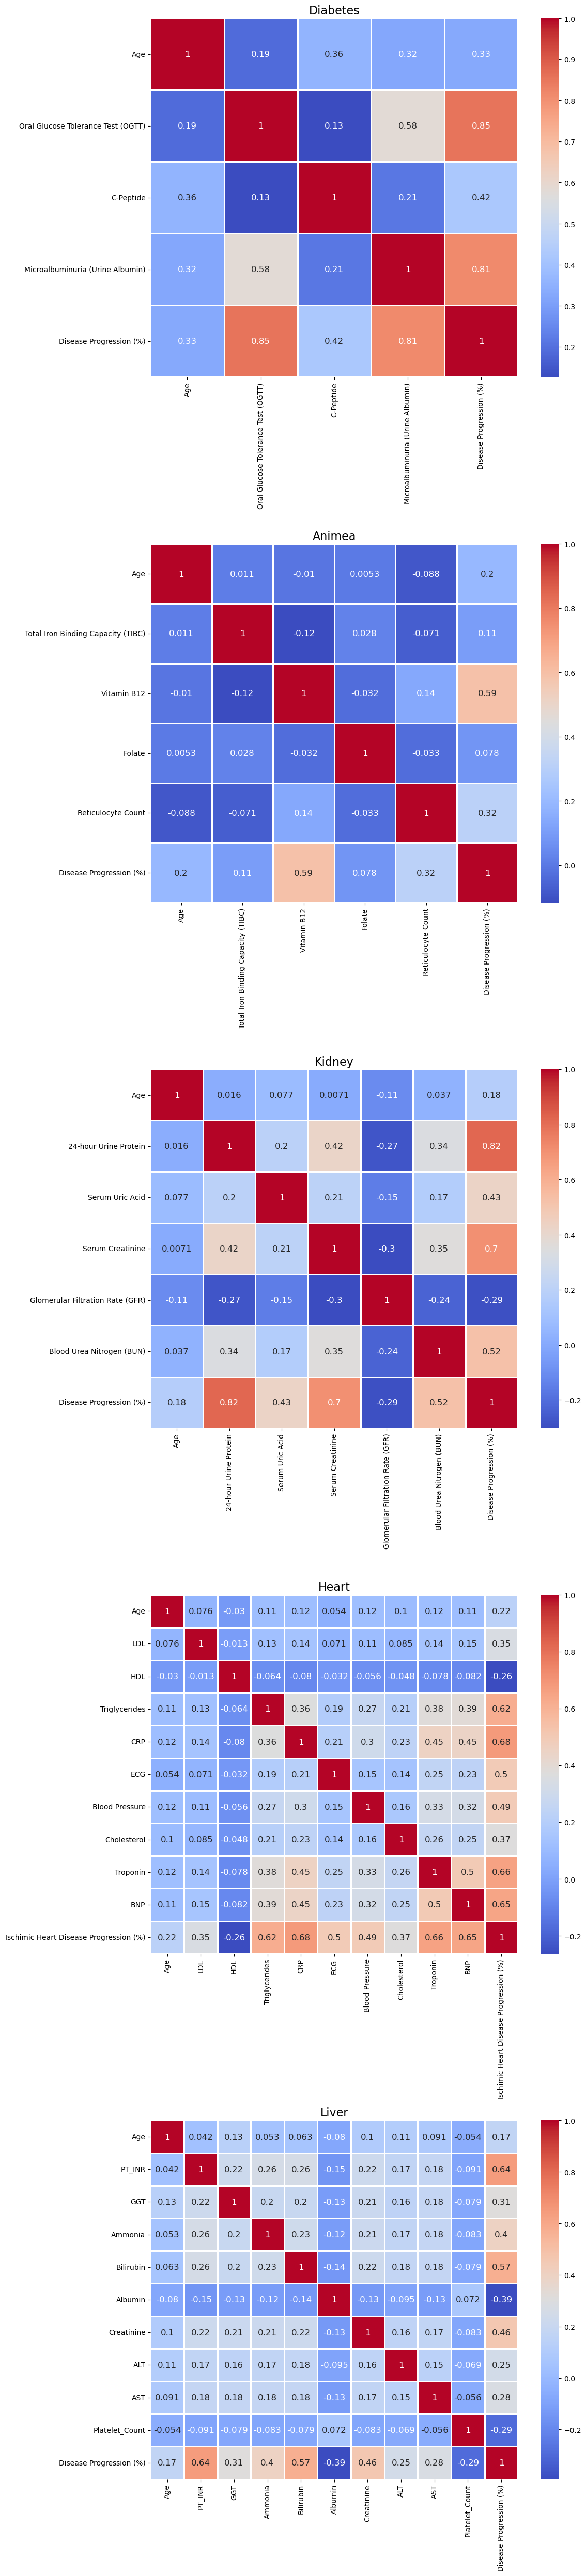

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Define datasets in a list
datasets = [df_D, df_A, df_k, df_h, df_liver]
titles = ["Diabetes", "Animea", "Kidney", "Heart", "Liver"]

# Create subplots
fig, axes = plt.subplots(5, 1, figsize=(12, 50))  # Taller figure for better visibility

for i, (df, title) in enumerate(zip(datasets, titles)):
    
    # Select only numeric columns
    df_numeric = df.select_dtypes(include=['number'])  
    
    # Compute correlation matrix
    correlation_matrix = df_numeric.corr()  
    
    # Plot heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", ax=axes[i], 
                annot_kws={"size": 12}, cbar=True, linewidths=1)  # Larger font and thicker lines
    axes[i].set_title(title, fontsize=16)  # Larger title font size

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()